# Introduction

We are given a dataset from the titanic listing passengers that survived or did not survive in the catastrophe. We are given information on the following things:

survival: Survival, 0=No, 1=Yes  
pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd   
name: Name
sex: Sex  
Age: Age in years  
sibsp: number of siblings/spouses aboard the Titanic  
parch: number of parents/children aboard the Titanic  
ticket: Ticket number  
fare: Passenger fare  
cabin: Cabin number  
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

For more information see [Kaggle](https://www.kaggle.com/c/titanic/data). 

# Importing the Necessary Libraries
We import the following libraries

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# A first Look at the Data

## Loading the Data

In [246]:
data=pd.read_csv("titanic_data.csv")

## Getting an Overview

In [247]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Values
We can see that there is data for 891 passengers and that there are NaNs in the Cabin column. It seems that there are also NaN in the Age column as the count is only 714. Lets check this:

In [249]:
np.isnan(data['Age']).sum()

177

There are 177 NaNs in the Age column.
Let's look further: As there is the full number of datasets in the columns PassengerID, Survived, Pclass, Age, SibSp, Parch and Fare we assume there are no NaNs there.   
Lets check the other columns for null values:

In [250]:
pd.isnull(data['Name']).sum()


0

In [251]:
pd.isnull(data['Sex']).sum()

0

In [252]:
pd.isnull(data['Ticket']).sum()

0

In [253]:
pd.isnull(data['Cabin']).sum()

687

In [254]:
pd.isnull(data['Embarked']).sum()

2

We conclude that there are missing values in the columns:  
Age  
Cabin  
Embarked

We keep the rows containing missing values anyway, as for the further analysis not all columns of the data are relevant.

## Number of Survivors

Next we want to find out how many people out of our dataset survived or did not survive.

In [255]:
data['Survived'].sum()

342

We can see that 342 out of the 891 passengers in our dataset survived the catastrophe.

# Asking questions and exploring the data

We are curious about what made a passenger more likely to survive.  
Especially we will take a look at the Pclass, Sex, Age and Fare. We are going to ask the following questions:
* How are Pclass, Fare and likelihood of survival related?
* Is Age and likelihood of survival related?


## Relationship of Pclass, Fare and Likelihood of Survival

In [256]:
data_1=data[['Pclass','Fare','Survived']]

In order to get a first idea of the relationship of these three variables we do a scatter plot of Pclass versus Fare and choose two different colours according to whether the passenger survived the catastrophe or not.

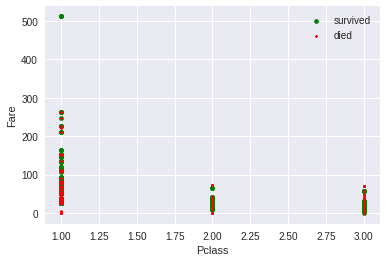

In [257]:
def plot1(dat):
    grouped_data_1=dat.groupby('Survived')
    surv=grouped_data_1.groups[1]
    ax=data_1.iloc[surv].plot.scatter(x='Pclass',y='Fare', color='green',label='survived')
    die=grouped_data_1.groups[0]
    data_1.iloc[die].plot.scatter(x='Pclass',y='Fare', color='red',label='died',marker='x',s=3,ax=ax)
plot1(data_1)

Looking at the plot it seems a bit like the passengers who paid more than 500 are outliers, so we take a closer look at that data:

In [258]:
data[data_1['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


The data looks normal otherwise, yet we consider these three cases outliers and exclude them from our statistics and redo out plot from above.

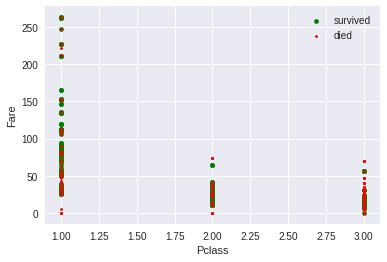

In [259]:
data_1a=data_1[data_1['Fare']<=500]
plot1(data_1a)

As we can see people seem to have paid a higher fare in order to get a lower Pclass. Let's investigate this further:

In [260]:
data_1a.groupby('Pclass')['Fare'].mean()

Pclass
1    78.124061
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In mean people obviously paid a higher fare for a lower Pclass. Let's take a look at some more details:

In [261]:
data_1a.groupby('Pclass')['Fare'].describe()

Pclass       
1       count    213.000000
        mean      78.124061
        std       59.996151
        min        0.000000
        25%       30.695800
        50%       57.979200
        75%       91.079200
        max      263.000000
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
Name: Fare, dtype: float64

We are of course interested in the likelihood of survival in relationship to the class and the fare. We do expect a higher survival rate in the lower classes, which turns out to be true:

In [262]:
data_1a.groupby('Pclass')['Survived'].mean()

Pclass
1    0.624413
2    0.472826
3    0.242363
Name: Survived, dtype: float64

As there was a higher fare for lower classes we expect a higher fare to lead to a higher survival rate. Lets investigate in some more detail:

Let's split the fares into percentiles and calculate the survival rate for each interval:

In [263]:
temp=pd.DataFrame(pd.qcut(data_1a['Fare'],[0,0.2,0.4,0.6,0.8,1]))
temp.columns=['Interval']
data_1b=pd.merge(data_1a,temp,left_index=True,right_index=True)

In [264]:
data_1b_rate=data_1b.groupby('Interval')['Survived'].mean()
data_1b_rate

Interval
[0, 7.854]          0.217877
(7.854, 10.5]       0.201087
(10.5, 21.075]      0.426901
(21.075, 39.688]    0.441989
(39.688, 263]       0.635838
Name: Survived, dtype: float64

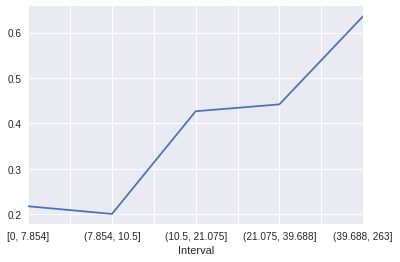

In [265]:
data_1b_rate.plot()

As expected the survival rate rises with the fare paid.

## Relationship of Age and Survival Rate

Next we want to look at the relationship of age and survival rate. To do this we select the appropriate columns and get rid of data that has NaN in the age column.

In [266]:
data_2=data_1=data[['Age','Survived']]
data_2a=data_2.dropna()

We make a first scatterplot and ...

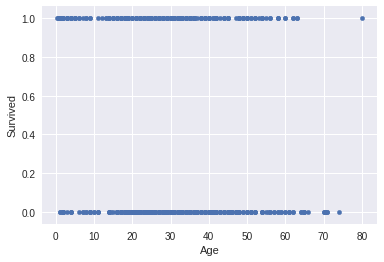

In [267]:
data_2.plot.scatter(x='Age',y='Survived')

... split the data into equidistant intervals and ...

In [268]:
temp=pd.DataFrame(pd.cut(data_2a['Age'],8))
temp.columns=['Interval']
data_2b=pd.merge(data_2a,temp,left_index=True,right_index=True)

look at the survival rate for each interval.

In [269]:
data_2b_rate=data_2b.groupby('Interval')['Survived'].mean()
data_2b_rate

Interval
(0.34, 10.367]       0.593750
(10.367, 20.315]     0.382609
(20.315, 30.263]     0.365217
(30.263, 40.21]      0.445161
(40.21, 50.157]      0.383721
(50.157, 60.105]     0.404762
(60.105, 70.0525]    0.235294
(70.0525, 80]        0.200000
Name: Survived, dtype: float64

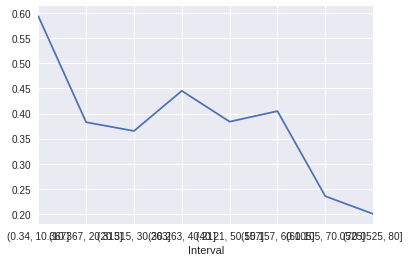

In [270]:
data_2b_rate.plot()

It looks like a younger age gave you a better chance of survival.

In order to make sure that we did not look at singleton groups we look at how many people in our dataset are in each age interval.

In [271]:
data_2b.groupby('Interval').size()

Interval
(0.34, 10.367]        64
(10.367, 20.315]     115
(20.315, 30.263]     230
(30.263, 40.21]      155
(40.21, 50.157]       86
(50.157, 60.105]      42
(60.105, 70.0525]     17
(70.0525, 80]          5
dtype: int64

As there are very few people aged 60 and above we admit that we cannot say too much about how likely a person that age survived or not.

# Conclusion

We first want to mention that this analysis is by far not complete and can do no more than give a first idea.  
Yet we do think that a lower pclass is related to having to pay a higher fare and that doing so gave you a better chance to survive the catastrophe. Furthermore there seems to be a relationship between age and survival, a younger age leading to a higher survival rate.